In [1]:
import pandas as pd

In [2]:
# 드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# 데이터셋 준비
# 출처 : 인천데이터포털 （https://www.data.go.kr/data/15048264/fileData.do）
df = pd.read_csv('/content/drive/MyDrive/Incheon BusTraffic Project/인천광역시_정류장별 이용승객 현황_2024-04-18.csv', encoding='euc-kr')

In [4]:
# 데이터셋 확인
df

,정류소명,정류소아이디,총승차건수,총하차건수,승차건수(카드),하차건수(카드),승차건수(현금),일평균승하차건수
0,(구)국제여객터미널,35051.0,29,1137,20,1137,9,37
1,(구)국제여객터미널,35052.0,1457,17,1451,17,6,47
2,(주)경동세라믹스,89146.0,598,23,598,23,0,20
3,(주)경인양행앞,42096.0,1002,848,1002,848,0,59
4,(주)경인양행앞,42097.0,1953,3833,1953,3833,0,186
...,...,...,...,...,...,...,...,...
6509,힐스테이트학익104동앞,37670.0,2681,4636,2681,4636,0,236
6510,힐캐슬프라자,39329.0,12142,17984,12127,17984,15,971
6511,힐캐슬프라자,39331.0,19895,10037,19876,10037,19,965
6512,힘찬병원,40891.0,5451,7161,5434,7161,17,406


In [5]:
# 컬럼명 다듬기
df = df.rename(columns={
    '정류소명': '정류소 이름',
    '정류소아이디': '정류소 ID',
    '총승차건수': '총 승차',
    '총하차건수': '총 하차',
    '승차건수(카드)': '카드 승차',
    '하차건수(카드)': '카드 하차',
    '승차건수(현금)': '현금 승차',
    '일평균승하차건수': '일평균 승하차'
})

In [6]:
# 다듬은 데이터셋 확인
df

,정류소 이름,정류소 ID,총 승차,총 하차,카드 승차,카드 하차,현금 승차,일평균 승하차
0,(구)국제여객터미널,35051.0,29,1137,20,1137,9,37
1,(구)국제여객터미널,35052.0,1457,17,1451,17,6,47
2,(주)경동세라믹스,89146.0,598,23,598,23,0,20
3,(주)경인양행앞,42096.0,1002,848,1002,848,0,59
4,(주)경인양행앞,42097.0,1953,3833,1953,3833,0,186
...,...,...,...,...,...,...,...,...
6509,힐스테이트학익104동앞,37670.0,2681,4636,2681,4636,0,236
6510,힐캐슬프라자,39329.0,12142,17984,12127,17984,15,971
6511,힐캐슬프라자,39331.0,19895,10037,19876,10037,19,965
6512,힘찬병원,40891.0,5451,7161,5434,7161,17,406


In [7]:
# 총 승차 많은 정류장 찾기
df[df['총 승차'] == df['총 승차'].max()]

,정류소 이름,정류소 ID,총 승차,총 하차,카드 승차,카드 하차,현금 승차,일평균 승하차
586,계양역,41357.0,188556,75458,188545,75458,11,8516


In [8]:
# 총 승차 적은 정류장 찾기
df[df['총 승차'] == df['총 승차'].min()]

,정류소 이름,정류소 ID,총 승차,총 하차,카드 승차,카드 하차,현금 승차,일평균 승하차
40,GS내리주유소,44130.0,0,7,0,7,0,0
41,GS내리주유소,44147.0,0,1,0,1,0,0
197,가천의대,43237.0,0,15,0,15,0,0
199,가톨릭대,43156.0,0,1,0,1,0,0
200,가톨릭대,43325.0,0,63,0,63,0,2
...,...,...,...,...,...,...,...,...
6372,화개사입구,90034.0,0,91,0,91,0,2
6388,화문석문화관,43452.0,0,21,0,21,0,0
6406,환경공단강화사업소,90109.0,0,8,0,8,0,0
6407,환경공단강화사업소,90110.0,0,34,0,34,0,1


In [9]:
# 총 하차 많은 정류장 찾기
df[df['총 하차'] == df['총 하차'].max()]

,정류소 이름,정류소 ID,총 승차,총 하차,카드 승차,카드 하차,현금 승차,일평균 승하차
1897,롯데백화점(인천터미널),37513.0,174509,163191,174377,163191,132,10893


In [10]:
# 총 하차 적은 정류장 찾기
min_total_off = df[df['총 하차'] == df['총 하차'].min()]
min_total_off

,정류소 이름,정류소 ID,총 승차,총 하차,카드 승차,카드 하차,현금 승차,일평균 승하차
122,가나안마을앞,43905.0,35,0,35,0,0,1
280,갑륭초교,43374.0,3,0,3,0,0,0
315,강화산단입구,90097.0,12,0,12,0,0,0
333,강화터미널,43058.0,5,0,5,0,0,0
357,건지사거리,42882.0,80,0,80,0,0,2
...,...,...,...,...,...,...,...,...
6389,화문석문화관,43697.0,1,0,0,0,1,0
6408,황곡노인정,89310.0,53,0,51,0,2,1
6417,황련사입구,43630.0,49,0,49,0,0,1
6419,황산도관광밸트,43873.0,3,0,2,0,1,0


In [11]:
# 카드 승차 많은 정류장 찾기
max_card_on = df[df['카드 승차'] == df['카드 승차'].max()]
max_card_on

,정류소 이름,정류소 ID,총 승차,총 하차,카드 승차,카드 하차,현금 승차,일평균 승하차
586,계양역,41357.0,188556,75458,188545,75458,11,8516


In [12]:
# 카드 승차 적은 정류장 찾기
min_card_off = df[df['카드 승차'] == df['카드 승차'].min()]
min_card_off

,정류소 이름,정류소 ID,총 승차,총 하차,카드 승차,카드 하차,현금 승차,일평균 승하차
40,GS내리주유소,44130.0,0,7,0,7,0,0
41,GS내리주유소,44147.0,0,1,0,1,0,0
88,SKLPG충전사업소,35638.0,14,715,0,715,14,23
197,가천의대,43237.0,0,15,0,15,0,0
199,가톨릭대,43156.0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
6388,화문석문화관,43452.0,0,21,0,21,0,0
6389,화문석문화관,43697.0,1,0,0,0,1,0
6406,환경공단강화사업소,90109.0,0,8,0,8,0,0
6407,환경공단강화사업소,90110.0,0,34,0,34,0,1


In [13]:
# 카드 하차 많은 종류장 찾기
max_card = df[df['카드 하차'] == df['카드 하차'].max()]
max_card

,정류소 이름,정류소 ID,총 승차,총 하차,카드 승차,카드 하차,현금 승차,일평균 승하차
1897,롯데백화점(인천터미널),37513.0,174509,163191,174377,163191,132,10893


In [14]:
# 카드 하차 적은 정류장 찾기
min_card_off = df[df['카드 하차'] == df['카드 하차'].min()]
min_card_off

,정류소 이름,정류소 ID,총 승차,총 하차,카드 승차,카드 하차,현금 승차,일평균 승하차
122,가나안마을앞,43905.0,35,0,35,0,0,1
280,갑륭초교,43374.0,3,0,3,0,0,0
315,강화산단입구,90097.0,12,0,12,0,0,0
333,강화터미널,43058.0,5,0,5,0,0,0
357,건지사거리,42882.0,80,0,80,0,0,2
...,...,...,...,...,...,...,...,...
6389,화문석문화관,43697.0,1,0,0,0,1,0
6408,황곡노인정,89310.0,53,0,51,0,2,1
6417,황련사입구,43630.0,49,0,49,0,0,1
6419,황산도관광밸트,43873.0,3,0,2,0,1,0


In [15]:
# 현금 승차 많은 정류장 찾기
max_cash = df[df['현금 승차'] == df['현금 승차'].max()]
max_cash

,정류소 이름,정류소 ID,총 승차,총 하차,카드 승차,카드 하차,현금 승차,일평균 승하차
334,강화터미널,43096.0,49758,1346,48947,1346,811,1648


In [16]:
# 현금 승차 적은 정류장 찾기
min_cash = df[df['현금 승차'] == df['현금 승차'].min()]
min_cash

,정류소 이름,정류소 ID,총 승차,총 하차,카드 승차,카드 하차,현금 승차,일평균 승하차
2,(주)경동세라믹스,89146.0,598,23,598,23,0,20
3,(주)경인양행앞,42096.0,1002,848,1002,848,0,59
4,(주)경인양행앞,42097.0,1953,3833,1953,3833,0,186
5,(주)대한특수금속,39050.0,1120,67,1120,67,0,38
6,(주)두남,39135.0,232,53,232,53,0,9
...,...,...,...,...,...,...,...,...
6501,힐스테이트송도더테라스(정문),38716.0,363,1177,363,1177,0,49
6502,힐스테이트송도더테라스(후문),38713.0,2830,2653,2830,2653,0,176
6503,힐스테이트송도더테라스(후문),38714.0,1154,2291,1154,2291,0,111
6508,힐스테이트학익104동앞,37669.0,1560,1837,1560,1837,0,109


In [17]:
# 일평균 승하차 많은 정류장 찾기
df[df['일평균 승하차'] == df['일평균 승하차'].max()]

,정류소 이름,정류소 ID,총 승차,총 하차,카드 승차,카드 하차,현금 승차,일평균 승하차
1897,롯데백화점(인천터미널),37513.0,174509,163191,174377,163191,132,10893


In [18]:
# 일평균 승하차 적은 정류장 찾기
df[df['일평균 승하차'] == df['일평균 승하차'].min()]

,정류소 이름,정류소 ID,총 승차,총 하차,카드 승차,카드 하차,현금 승차,일평균 승하차
40,GS내리주유소,44130.0,0,7,0,7,0,0
41,GS내리주유소,44147.0,0,1,0,1,0,0
121,가나안마을앞,43904.0,2,15,1,15,1,0
123,가능포,43969.0,6,8,5,8,1,0
124,가능포,43970.0,4,13,3,13,1,0
...,...,...,...,...,...,...,...,...
6463,효자교앞,90199.0,4,3,4,3,0,0
6464,효자교앞,90200.0,5,12,5,12,0,0
6480,흥왕리,90073.0,1,6,1,6,0,0
6481,흥왕리,90074.0,4,2,3,2,1,0


In [19]:
 # 총 승차 대비 총 하차 비율 구하기
df['총 승차 대비 총 하차'] = (df['총 하차'] / df['총 승차']) * 100

In [20]:
import numpy as np

In [21]:
# 무한대값 방지 위해 NaN값 처리
df['총 승차 대비 총 하차'].replace(np.inf, np.nan, inplace=True)

In [22]:
# 총 승차 대비 총 하차 많은 정류장 찾기
df[df['총 승차 대비 총 하차'].max() == df['총 승차 대비 총 하차'] ]

,정류소 이름,정류소 ID,총 승차,총 하차,카드 승차,카드 하차,현금 승차,일평균 승하차,총 승차 대비 총 하차
872,국제이노베이션,37573.0,1,1846,1,1846,0,59,184600.0


In [23]:
# 총 하차 대비 총 승차 비율 구하기
df['총 하차 대비 총 승차'] = (df['총 승차'] / df['총 하차']) * 100
# 무한대값 방지 위해 NaN값 처리
df['총 하차 대비 총 승차'].replace(np.inf, np.nan, inplace=True)

In [24]:
# 총 하차 대비 총 승차 많은 정류장 찾기
df[df['총 하차 대비 총 승차'].max() == df['총 하차 대비 총 승차']]

,정류소 이름,정류소 ID,총 승차,총 하차,카드 승차,카드 하차,현금 승차,일평균 승하차,총 승차 대비 총 하차,총 하차 대비 총 승차
3160,선릉역,23218.0,2984,4,2984,4,0,96,0.134048,74600.0


In [25]:
# 카드 승차 대비 카드 하차 비율 구하기
df['카드 승차 대비 카드 하차'] = (df['카드 하차'] / df['카드 승차']) * 100
# 무한대값 방지 위해 NaN값 처리
df['카드 승차 대비 카드 하차'].replace(np.inf, np.nan, inplace=True)

In [26]:
# 카드 승차 대비 카드 하차 많은 정류장 찾기
df[df['카드 승차 대비 카드 하차'] == df['카드 승차 대비 카드 하차'].max()]

,정류소 이름,정류소 ID,총 승차,총 하차,카드 승차,카드 하차,현금 승차,일평균 승하차,총 승차 대비 총 하차,총 하차 대비 총 승차,카드 승차 대비 카드 하차
872,국제이노베이션,37573.0,1,1846,1,1846,0,59,184600.0,0.054171,184600.0


In [27]:
# 카드 하차 대비 카드 승차 비율 구하기
df['카드 하차 대비 카드 승차'] = (df['카드 승차'] / df['카드 하차']) * 100
# 무한대값 방지 위해 NaN값 처리
df['카드 하차 대비 카드 승차'].replace(np.inf, np.nan, inplace=True)

In [28]:
# 카드 하차 대비 카드 승차 많은 정류장 찾기
df[df['카드 하차 대비 카드 승차'] == df['카드 하차 대비 카드 승차'].max()]

,정류소 이름,정류소 ID,총 승차,총 하차,카드 승차,카드 하차,현금 승차,일평균 승하차,총 승차 대비 총 하차,총 하차 대비 총 승차,카드 승차 대비 카드 하차,카드 하차 대비 카드 승차
3160,선릉역,23218.0,2984,4,2984,4,0,96,0.134048,74600.0,0.134048,74600.0


In [29]:
# 현금 승차 대비 카드 승차 비율 구하기
df['현금 승차 대비 카드 승차'] = (df['카드 승차'] / df['현금 승차']) * 100
# 무한대값 방지 위해 NaN값 처리
df['현금 승차 대비 카드 승차'].replace(np.inf, np.nan, inplace=True)

In [30]:
# 현금 승차 대비 카드 승차 많은 정류장 찾기
df[df['현금 승차 대비 카드 승차'] == df['현금 승차 대비 카드 승차'].max()]

,정류소 이름,정류소 ID,총 승차,총 하차,카드 승차,카드 하차,현금 승차,일평균 승하차,총 승차 대비 총 하차,총 하차 대비 총 승차,카드 승차 대비 카드 하차,카드 하차 대비 카드 승차,현금 승차 대비 카드 승차
543,계산역,41426.0,31529,21666,31528,21666,1,1715,68.717688,145.522939,68.719868,145.518324,3152800.0


In [31]:
# 카드 승차 대비 현금 승차 비율 구하기
df['카드 승차 대비 현금 승차'] = (df['현금 승차'] / df['카드 승차']) * 100
# 무한대값 방지 위해 NaN값 처리
df['카드 승차 대비 현금 승차'].replace(np.inf, np.nan, inplace=True)

In [32]:
# 카드 승차 대비 현금 승차 많은 정류장 찾기
df[df['카드 승차 대비 현금 승차'] == df['카드 승차 대비 현금 승차'].max()]

,정류소 이름,정류소 ID,총 승차,총 하차,카드 승차,카드 하차,현금 승차,일평균 승하차,총 승차 대비 총 하차,총 하차 대비 총 승차,카드 승차 대비 카드 하차,카드 하차 대비 카드 승차,현금 승차 대비 카드 승차,카드 승차 대비 현금 승차
5137,장수공영차고지,92064.0,246,160,16,160,230,13,65.04065,153.75,1000.0,10.0,6.956522,1437.5


In [33]:
# 카드승차와 카드하차의 비례관계 구하기

In [34]:
import seaborn as sb
import matplotlib.pyplot as plt

In [35]:
# 차트 한글 안 깨지게 설정하기

# 1. 나눔폰트 설치
!sudo apt-get install -y fonts-nanum

# 2. 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumBarunGothic'

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [36]:
# 3. 폰트 캐시 갱신
!fc-cache -f -v

# 4. 라이브러리 캐시 삭제
import shutil
import matplotlib

shutil.rmtree(matplotlib.get_cachedir(), ignore_errors=True)

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache director

In [37]:
# 카드 승차와 카드 하차 데이터 가져오기
card_on = df['카드 승차']
card_off = df['카드 하차']

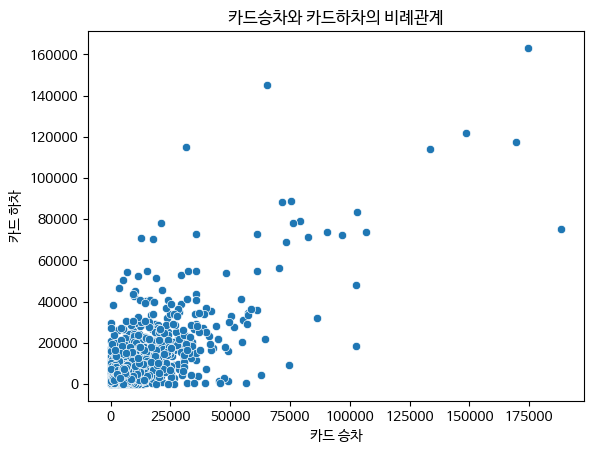

In [38]:
# 산점도 그래프 그리기
sb.scatterplot(x=card_on, y=card_off)
plt.xlabel('카드 승차')
plt.ylabel('카드 하차')
plt.title('카드승차와 카드하차의 비례관계')
plt.show()

In [39]:
# 현금승차와 카드승차의 비례관계 구하기

# 현금 승차와 카드 승차 데이터 가져오기
cash_on = df['현금 승차']
card_on = df['카드 승차']

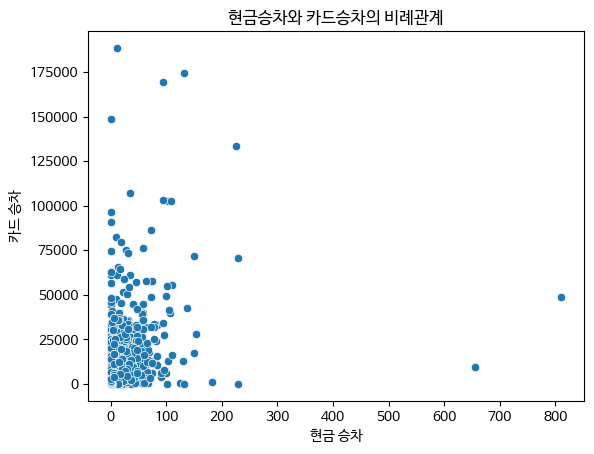

In [40]:
# 산점도 그래프 그리기
sb.scatterplot(x=cash_on, y=card_on)
plt.xlabel('현금 승차')
plt.ylabel('카드 승차')
plt.title('현금승차와 카드승차의 비례관계')
plt.show()

In [41]:
# 데이터셋 다시 확인
df

,정류소 이름,정류소 ID,총 승차,총 하차,카드 승차,카드 하차,현금 승차,일평균 승하차,총 승차 대비 총 하차,총 하차 대비 총 승차,카드 승차 대비 카드 하차,카드 하차 대비 카드 승차,현금 승차 대비 카드 승차,카드 승차 대비 현금 승차
0,(구)국제여객터미널,35051.0,29,1137,20,1137,9,37,3920.689655,2.550572,5685.000000,1.759015,222.222222,45.000000
1,(구)국제여객터미널,35052.0,1457,17,1451,17,6,47,1.166781,8570.588235,1.171606,8535.294118,24183.333333,0.413508
2,(주)경동세라믹스,89146.0,598,23,598,23,0,20,3.846154,2600.000000,3.846154,2600.000000,NaN,0.000000
3,(주)경인양행앞,42096.0,1002,848,1002,848,0,59,84.630739,118.160377,84.630739,118.160377,NaN,0.000000
4,(주)경인양행앞,42097.0,1953,3833,1953,3833,0,186,196.262161,50.952257,196.262161,50.952257,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6509,힐스테이트학익104동앞,37670.0,2681,4636,2681,4636,0,236,172.920552,57.830026,172.920552,57.830026,NaN,0.000000
6510,힐캐슬프라자,39329.0,12142,17984,12127,17984,15,971,148.113985,67.515569,148.297188,67.432162,80846.666667,0.123691
6511,힐캐슬프라자,39331.0,19895,10037,19876,10037,19,965,50.449862,198.216599,50.498088,198.027299,104610.526316,0.095593
6512,힘찬병원,40891.0,5451,7161,5434,7161,17,406,131.370391,76.120654,131.781377,75.883257,31964.705882,0.312845


In [42]:
# 다듬은 데이터셋 내보내기
df.to_csv('(가공한)인천광역시_정류장별 이용승객 현황_2024-04-18.csv', encoding='euc-kr', index=False)

In [43]:
# 머신러닝할 데이터셋 로드
df_ml = pd.read_csv('/content/drive/MyDrive/Incheon BusTraffic Project/(가공한)인천광역시_정류장별 이용승객 현황_2024-04-18.csv', encoding='euc-kr')

In [44]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# 정류소 이름 열을 정수로 인코딩
df_ml['정류소 이름'] = label_encoder.fit_transform(df_ml['정류소 이름'])

In [45]:
# 다중 출력 회귀모델 임포트
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

In [46]:
print(df_ml.columns)

Index(['정류소 이름', '정류소 ID', '총 승차', '총 하차', '카드 승차', '카드 하차', '현금 승차',
       '일평균 승하차', '총 승차 대비 총 하차', '총 하차 대비 총 승차', '카드 승차 대비 카드 하차',
       '카드 하차 대비 카드 승차', '현금 승차 대비 카드 승차', '카드 승차 대비 현금 승차'],
      dtype='object')


In [47]:
# 입력 변수와 예측 대상 선택
X = df_ml.drop(["총 승차", "총 하차"], axis=1) # 입력 변수: 총 승차와 총 하차 제외한 모든 컬럼
y = df_ml[["총 승차", "총 하차"]] # 예측 대상: 총 승차와 총 하차

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
# 데이터 분할 (학습 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# 다중 출력 회귀 모델 선택
base_model = RandomForestRegressor()

In [51]:
# 다중 출력 회귀 모델로 변환
model = MultiOutputRegressor(base_model)

In [56]:
# NaN 값을 제거합니다.
df_ml.dropna(axis=0, how='any', inplace=True)

# 제거된 NaN 값을 확인합니다.
print("NaN이 제거된 DataFrame:")
print(df_ml)

NaN이 제거된 DataFrame:
      정류소 이름   정류소 ID   총 승차   총 하차  카드 승차  카드 하차  현금 승차  일평균 승하차  \
0          0  35051.0     29   1137     20   1137      9       37   
1          0  35052.0   1457     17   1451     17      6       47   
17        11  40832.0     12    516      5    516      7       17   
18        12  40154.0   3495   5274   3494   5274      1      282   
19        12  40159.0  30555  13326  30540  13326     15     1415   
...      ...      ...    ...    ...    ...    ...    ...      ...   
6507    3800  37023.0   5137   7681   5131   7681      6      413   
6510    3802  39329.0  12142  17984  12127  17984     15      971   
6511    3802  39331.0  19895  10037  19876  10037     19      965   
6512    3803  40891.0   5451   7161   5434   7161     17      406   
6513    3803  40892.0   4071   2873   4065   2873      6      224   

      총 승차 대비 총 하차  총 하차 대비 총 승차  카드 승차 대비 카드 하차  카드 하차 대비 카드 승차  \
0      3920.689655      2.550572     5685.000000        1.759015   
1         1.166